In [1]:
import pandas as pd 
import numpy as np 
import math as mt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense
from tensorflow.keras.optimizers import Adam
failure_data = r'C:\Users\Niranjan\Desktop\BISAG\machine failed\cleaned_data.csv'
df = pd.read_csv(failure_data)
df2 = pd.DataFrame(df)
df2["Date"] = df2['Date'].astype(str) + "  " + df2['Time'].astype(str)
df2['Date']= pd.to_datetime(df2['Date'], format='%d-%m-%Y %H:%M:%S')
df2 = df2.drop(['Time'],axis = 1)
df3=df2
df2 = df2.set_index("Date")
dataset = df2

In [5]:

# Define the anomalies start and end dates
anomaly1_start_date = pd.to_datetime('2021-10-19')
anomaly1_end_date = pd.to_datetime('2021-10-19')
anomaly2_start_date = pd.to_datetime('2022-06-25')
anomaly2_end_date = pd.to_datetime('2022-06-25')

# Split the dataset into train and test sets
train_data = dataset[dataset.index < anomaly1_start_date]
test_data = dataset[(dataset.index >= anomaly1_start_date) & (dataset.index <= anomaly2_end_date)]

# Select the features and target variable
features = dataset.columns.tolist()
target_variable = 'Failure'

# Scale the data
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

# Prepare the training data
n_steps = 12  # Number of time steps (past observations) to consider
train_X, train_Y = [], []
for i in range(n_steps, len(train_scaled)):
    train_X.append(train_scaled[i - n_steps:i])
    train_Y.append(train_scaled[i, dataset.columns.get_loc(target_variable)])

train_X, train_Y = np.array(train_X), np.array(train_Y)

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='mse')

# Train the model
history = model.fit(train_X, train_Y, epochs=20, batch_size=16, verbose=1)

# Prepare the test data
test_X, test_Y = [], []
for i in range(n_steps, len(test_scaled)):
    test_X.append(test_scaled[i - n_steps:i])
    test_Y.append(test_scaled[i, dataset.columns.get_loc(target_variable)])

test_X, test_Y = np.array(test_X), np.array(test_Y)

# Make predictions on the test data
test_predictions = model.predict(test_X)

# Reshape the predicted values to match the original shape
test_predictions = test_predictions.reshape(-1, 1)

# Inverse scaling
test_predictions = scaler.inverse_transform(test_predictions)

# Convert the predictions and ground truth to pandas DataFrame for visualization
predicted_df = pd.DataFrame(test_predictions, index=test_data.index[n_steps:], columns=[target_variable])
actual_df = pd.DataFrame(test_data[target_variable].values[n_steps:], index=test_data.index[n_steps:], columns=[target_variable])

# Plot the predicted and actual values
plt.figure(figsize=(10, 6))
plt.plot(predicted_df.index, predicted_df[target_variable], label='Predicted')
plt.plot(actual_df.index, actual_df[target_variable], label='Actual')
plt.xlabel('Date')
plt.ylabel(target_variable)
plt.title('Predicted vs Actual')
plt.legend()
plt.show()



Epoch 1/20
18/18 [==============================] - 2s 5ms/step - loss: 0.0034
Epoch 2/20
18/18 [==============================] - 0s 5ms/step - loss: 7.6680e-04
Epoch 3/20
18/18 [==============================] - 0s 5ms/step - loss: 2.3628e-04
Epoch 4/20
18/18 [==============================] - 0s 4ms/step - loss: 1.2051e-04
Epoch 5/20
18/18 [==============================] - 0s 5ms/step - loss: 9.0844e-05
Epoch 6/20
18/18 [==============================] - 0s 4ms/step - loss: 4.9851e-05
Epoch 7/20
18/18 [==============================] - 0s 5ms/step - loss: 4.6393e-05
Epoch 8/20
18/18 [==============================] - 0s 5ms/step - loss: 3.1047e-05
Epoch 9/20
18/18 [==============================] - 0s 5ms/step - loss: 2.1856e-05
Epoch 10/20
18/18 [==============================] - 0s 5ms/step - loss: 2.1784e-05
Epoch 11/20
18/18 [==============================] - 0s 5ms/step - loss: 1.4414e-05
Epoch 12/20
18/18 [==============================] - 0s 5ms/step - loss: 1.3791e-05
Epoch

ValueError: non-broadcastable output operand with shape (1932,1) doesn't match the broadcast shape (1932,22)

Epoch 1/15
175/175 [==============================] - 1s 3ms/step - loss: 0.4754
Epoch 2/15
175/175 [==============================] - 1s 3ms/step - loss: 0.2847
Epoch 3/15
175/175 [==============================] - 0s 3ms/step - loss: 0.2234
Epoch 4/15
175/175 [==============================] - 0s 3ms/step - loss: 0.1692
Epoch 5/15
175/175 [==============================] - 0s 3ms/step - loss: 0.1784
Epoch 6/15
175/175 [==============================] - 0s 3ms/step - loss: 0.1727
Epoch 7/15
175/175 [==============================] - 0s 3ms/step - loss: 0.1488
Epoch 8/15
175/175 [==============================] - 1s 3ms/step - loss: 0.1322
Epoch 9/15
175/175 [==============================] - 0s 3ms/step - loss: 0.1275
Epoch 10/15
175/175 [==============================] - 1s 3ms/step - loss: 0.1203
Epoch 11/15
175/175 [==============================] - 0s 3ms/step - loss: 0.1284
Epoch 12/15
175/175 [==============================] - 1s 3ms/step - loss: 0.1094
Epoch 13/15
175/175 [====

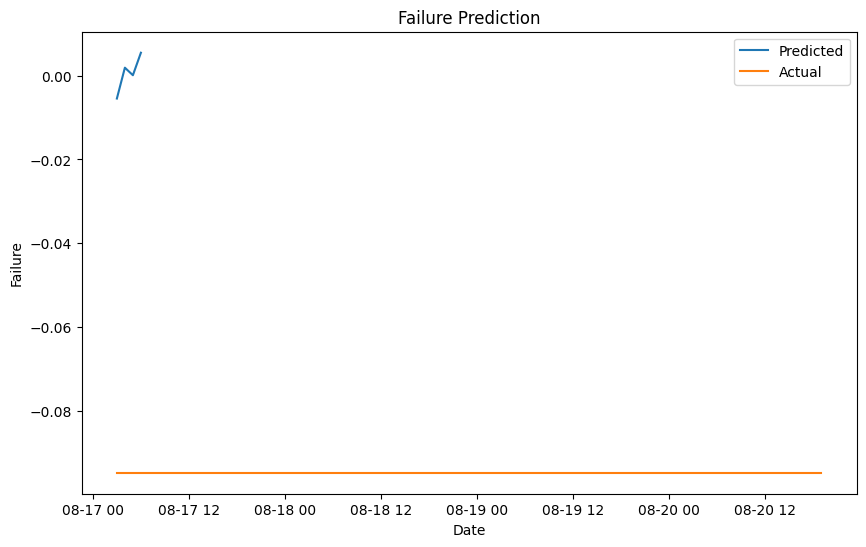

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

# Load and preprocess the dataset
failure_data = r'C:\Users\Niranjan\Desktop\BISAG\machine failed\cleaned_data.csv'
dataset = pd.read_csv(failure_data)
df = dataset
df2 = pd.DataFrame(df)
df2["Date"] = df2['Date'].astype(str) + "  " + df2['Time'].astype(str)
df2['Date'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y %H:%M:%S')
df2 = df2.drop(['Time'], axis=1)
df2 = df2.set_index("Date")
df_for_training = df2.astype(float)
target_variable = 'Failure'

# Split the data into train and test sets
train_data = df_for_training.iloc[:-100]
test_data = df_for_training.iloc[-100:]

# Normalize the data
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Define the number of time steps and features
n_steps = 12
n_features = df_for_training.shape[1]

# Prepare the training data
train_X, train_y = [], []
for i in range(n_steps, len(train_data_scaled)):
    train_X.append(train_data_scaled[i - n_steps:i])
    train_y.append(train_data_scaled[i, df_for_training.columns.get_loc(target_variable)])
train_X, train_y = np.array(train_X), np.array(train_y)

# Prepare the test data
test_X, test_y = [], []
for i in range(n_steps, len(test_data_scaled)):
    test_X.append(test_data_scaled[i - n_steps:i])
    test_y.append(test_data_scaled[i, df_for_training.columns.get_loc(target_variable)])
test_X, test_y = np.array(test_X), np.array(test_y)

# Define and train the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model.fit(train_X, train_y, epochs=15, batch_size=16)

# Make predictions on the test data
test_predictions = model.predict(test_X)

# Reshape test_predictions to match the shape of the original scaled data
test_predictions = test_predictions.reshape(-1, n_features)

# Inverse scaling
test_predictions = scaler.inverse_transform(test_predictions)

# Convert the predictions and ground truth to pandas DataFrame for visualization
predicted_df = pd.DataFrame(test_predictions, index=test_data.index[n_steps:n_steps + len(test_predictions)], columns=df_for_training.columns)
actual_df = pd.DataFrame(test_y, index=test_data.index[n_steps:], columns=[target_variable])

# Plot the predicted and actual values
plt.figure(figsize=(10, 6))
plt.plot(predicted_df.index, predicted_df[target_variable], label='Predicted')
plt.plot(actual_df.index, actual_df[target_variable], label='Actual')
plt.xlabel('Date')
plt.ylabel(target_variable)
plt.title('Failure Prediction')
plt.legend()
plt.show()



In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

# Load and preprocess the dataset
failure_data = r'C:\Users\Niranjan\Desktop\BISAG\machine failed\cleaned_data.csv'
dataset = pd.read_csv(failure_data)
df = dataset
df2 = pd.DataFrame(df)
df2["Date"] = df2['Date'].astype(str) + "  " + df2['Time'].astype(str)
df2['Date'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y %H:%M:%S')
df2 = df2.drop(['Time'], axis=1)
df2 = df2.set_index("Date")
df_for_training = df2.astype(float)
target_variable = 'Failure'

# Split the data into train and test sets based on the specified time range
train_data = df_for_training.loc[:'2022-06-30 07:00:00']
test_data = df_for_training.loc['2022-06-30 07:00:00':'2022-08-20 19:00:00']

# Normalize the data
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Define the number of time steps and features
n_steps = 12
n_features = df_for_training.shape[1]

# Prepare the training data
train_X, train_y = [], []
for i in range(n_steps, len(train_data_scaled)):
    train_X.append(train_data_scaled[i - n_steps:i])
    train_y.append(train_data_scaled[i, df_for_training.columns.get_loc(target_variable)])
train_X, train_y = np.array(train_X), np.array(train_y)

# Prepare the test data
test_X, test_y = [], []
for i in range(n_steps, len(test_data_scaled)):
    test_X.append(test_data_scaled[i - n_steps:i])
    test_y.append(test_data_scaled[i, df_for_training.columns.get_loc(target_variable)])
test_X, test_y = np.array(test_X), np.array(test_y)

# Define and train the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model.fit(train_X, train_y, epochs=10, batch_size=16)

# Make predictions on the test data
test_predictions = model.predict(test_X)

# Reshape test_predictions to match the shape of the original scaled data
test_predictions = test_predictions.reshape(-1, n_features)

# Inverse scaling
test_predictions = scaler.inverse_transform(test_predictions)

# Convert the predictions and ground truth to pandas DataFrame for visualization
predicted_df = pd.DataFrame(test_predictions, index=test_data.index[n_steps:n_steps + len(test_predictions)], columns=df_for_training.columns)
actual_df = pd.DataFrame(test_y, index=test_data.index[n_steps:], columns=[target_variable])

# Plot the predicted and actual values
plt.figure(figsize=(10, 6))
plt.plot(predicted_df.index, predicted_df[target_variable], label='Predicted')
plt.plot(actual_df.index, actual_df[target_variable], label='Actual')
plt.xlabel('Date')
plt.ylabel(target_variable)
plt.title('Failure Prediction')
plt.legend()
plt.show()



Epoch 1/10
141/141 [==============================] - 1s 3ms/step - loss: 0.4727
Epoch 2/10
141/141 [==============================] - 0s 3ms/step - loss: 0.2173
Epoch 3/10
141/141 [==============================] - 0s 3ms/step - loss: 0.1966
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 0.1905
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 0.1765
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.1505
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.1423
Epoch 8/10
141/141 [==============================] - 0s 3ms/step - loss: 0.1611
Epoch 9/10
141/141 [==============================] - 0s 3ms/step - loss: 0.1253
Epoch 10/10
20/20 [==============================] - 0s 2ms/step


ValueError: cannot reshape array of size 640 into shape (22)

Epoch 1/10
141/141 [==============================] - 1s 3ms/step - loss: 0.6399
Epoch 2/10
141/141 [==============================] - 0s 3ms/step - loss: 0.3773
Epoch 3/10
141/141 [==============================] - 0s 3ms/step - loss: 0.2527
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 0.2461
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 0.2340
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.2375
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.1826
Epoch 8/10
141/141 [==============================] - 0s 3ms/step - loss: 0.1714
Epoch 9/10
141/141 [==============================] - 0s 3ms/step - loss: 0.1901
Epoch 10/10
20/20 [==============================] - 0s 1ms/step


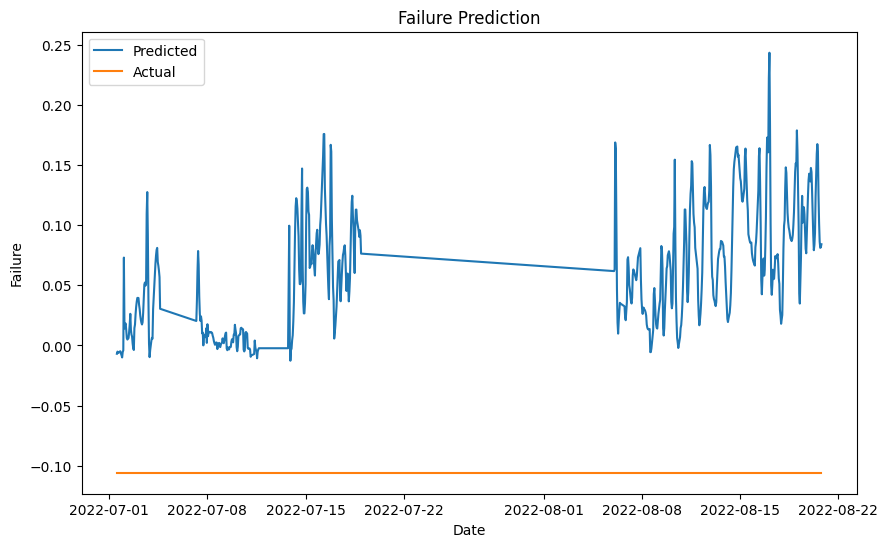

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

# Load and preprocess the dataset
failure_data = r'C:\Users\Niranjan\Desktop\BISAG\machine failed\cleaned_data.csv'
dataset = pd.read_csv(failure_data)
df = dataset
df2 = pd.DataFrame(df)
df2["Date"] = df2['Date'].astype(str) + "  " + df2['Time'].astype(str)
df2['Date'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y %H:%M:%S')
df2 = df2.drop(['Time'], axis=1)
df2 = df2.set_index("Date")
df_for_training = df2.astype(float)
target_variable = 'Failure'

# Split the data into train and test sets based on the specified time range
train_data = df_for_training.loc[:'2022-06-30 07:00:00']
test_data = df_for_training.loc['2022-06-30 07:00:00':'2022-08-20 19:00:00']

# Normalize the data
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Define the number of time steps and features
n_steps = 12
n_features = df_for_training.shape[1]

# Prepare the training data
train_X, train_y = [], []
for i in range(n_steps, len(train_data_scaled)):
    train_X.append(train_data_scaled[i - n_steps:i])
    train_y.append(train_data_scaled[i, df_for_training.columns.get_loc(target_variable)])
train_X, train_y = np.array(train_X), np.array(train_y)

# Prepare the test data
test_X, test_y = [], []
for i in range(n_steps, len(test_data_scaled)):
    test_X.append(test_data_scaled[i - n_steps:i])
    test_y.append(test_data_scaled[i, df_for_training.columns.get_loc(target_variable)])
test_X, test_y = np.array(test_X), np.array(test_y)

# Define and train the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(n_features))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model.fit(train_X, train_y, epochs=10, batch_size=16)

# Make predictions on the test data
test_predictions = model.predict(test_X)

# Reshape test_predictions to match the shape of the original scaled data
test_predictions = test_predictions.reshape(-1, n_features)

# Inverse scaling
test_predictions = scaler.inverse_transform(test_predictions)

# Convert the predictions and ground truth to pandas DataFrame for visualization
predicted_df = pd.DataFrame(test_predictions, index=test_data.index[n_steps:n_steps + len(test_predictions)], columns=df_for_training.columns)
actual_df = pd.DataFrame(test_y, index=test_data.index[n_steps:], columns=[target_variable])

# Plot the predicted and actual values
plt.figure(figsize=(10, 6))
plt.plot(predicted_df.index, predicted_df[target_variable], label='Predicted')
plt.plot(actual_df.index, actual_df[target_variable], label='Actual')
plt.xlabel('Date')
plt.ylabel(target_variable)
plt.title('Failure Prediction')
plt.legend()
plt.show()


Epoch 1/10
128/128 [==============================] - 1s 3ms/step - loss: 1.0302
Epoch 2/10
128/128 [==============================] - 0s 3ms/step - loss: 1.0009
Epoch 3/10
128/128 [==============================] - 0s 3ms/step - loss: 0.9693
Epoch 4/10
128/128 [==============================] - 0s 3ms/step - loss: 0.9365
Epoch 5/10
128/128 [==============================] - 0s 3ms/step - loss: 0.8908
Epoch 6/10
128/128 [==============================] - 0s 3ms/step - loss: 0.7797
Epoch 7/10
128/128 [==============================] - 0s 3ms/step - loss: 0.7091
Epoch 8/10
128/128 [==============================] - 0s 3ms/step - loss: 0.5339
Epoch 9/10
128/128 [==============================] - 0s 3ms/step - loss: 0.5693
Epoch 10/10
27/27 [==============================] - 0s 1ms/step


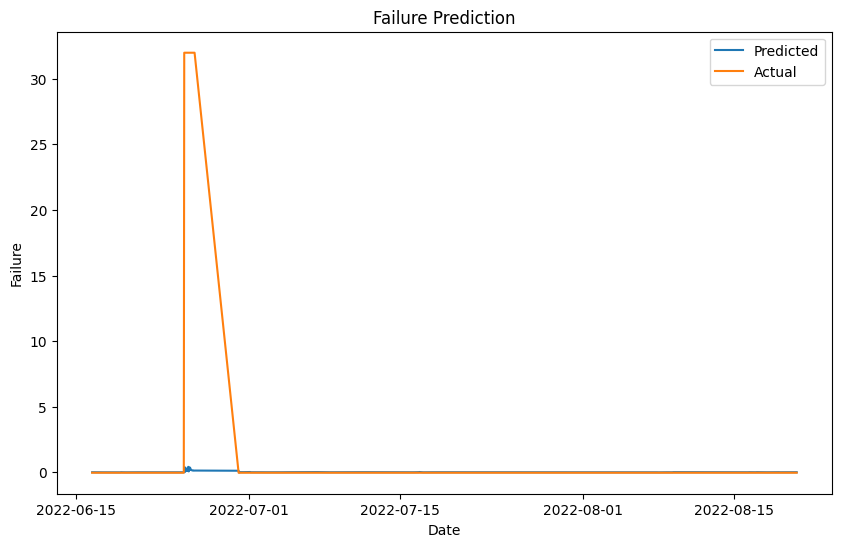

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

# Load and preprocess the dataset
failure_data = r'C:\Users\Niranjan\Desktop\BISAG\machine failed\cleaned_data.csv'
dataset = pd.read_csv(failure_data)
df = dataset
df2 = pd.DataFrame(df)
df2["Date"] = df2['Date'].astype(str) + "  " + df2['Time'].astype(str)
df2['Date'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y %H:%M:%S')
df2 = df2.drop(['Time'], axis=1)
df2 = df2.set_index("Date")
df_for_training = df2.astype(float)
target_variable = 'Failure'

# Split the data into train and test sets based on the specified time range
train_data = df_for_training.loc[:'2022-05-15 23:00:00']
test_data = df_for_training.loc['2022-05-15 23:00:00':'2022-08-20 19:00:00']

# Normalize the data
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Define the number of time steps and features
n_steps = 12
n_features = df_for_training.shape[1]

# Prepare the training data
train_X, train_y = [], []
for i in range(n_steps, len(train_data_scaled)):
    train_X.append(train_data_scaled[i - n_steps:i])
    train_y.append(train_data_scaled[i, df_for_training.columns.get_loc(target_variable)])
train_X, train_y = np.array(train_X), np.array(train_y)

# Prepare the test data
test_X, test_y = [], []
for i in range(n_steps, len(test_data_scaled)):
    test_X.append(test_data_scaled[i - n_steps:i])
    test_y.append(test_data_scaled[i, df_for_training.columns.get_loc(target_variable)])
test_X, test_y = np.array(test_X), np.array(test_y)

# Define and train the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(n_features))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model.fit(train_X, train_y, epochs=10, batch_size=16)

# Make predictions on the test data
test_predictions = model.predict(test_X)

# Reshape test_predictions to match the shape of the original scaled data
test_predictions = test_predictions.reshape(-1, n_features)

# Inverse scaling
test_predictions = scaler.inverse_transform(test_predictions)

# Convert the predictions and ground truth to pandas DataFrame for visualization
predicted_df = pd.DataFrame(test_predictions, index=test_data.index[n_steps:n_steps + len(test_predictions)], columns=df_for_training.columns)
actual_df = pd.DataFrame(test_y, index=test_data.index[n_steps:], columns=[target_variable])

# Plot the predicted and actual values
plt.figure(figsize=(10, 6))
plt.plot(predicted_df.index, predicted_df[target_variable], label='Predicted')
plt.plot(actual_df.index, actual_df[target_variable], label='Actual')
plt.xlabel('Date')
plt.ylabel(target_variable)
plt.title('Failure Prediction')
plt.legend()
plt.show()


Epoch 1/10
128/128 [==============================] - 1s 3ms/step - loss: 1.0168
Epoch 2/10
128/128 [==============================] - 0s 3ms/step - loss: 0.9936
Epoch 3/10
128/128 [==============================] - 0s 3ms/step - loss: 0.9680
Epoch 4/10
128/128 [==============================] - 0s 3ms/step - loss: 0.9425
Epoch 5/10
128/128 [==============================] - 0s 3ms/step - loss: 0.8663
Epoch 6/10
128/128 [==============================] - 0s 3ms/step - loss: 0.7508
Epoch 7/10
128/128 [==============================] - 0s 3ms/step - loss: 0.6534
Epoch 8/10
128/128 [==============================] - 0s 3ms/step - loss: 0.5458
Epoch 9/10
128/128 [==============================] - 0s 3ms/step - loss: 0.5446
Epoch 10/10
27/27 [==============================] - 0s 2ms/step


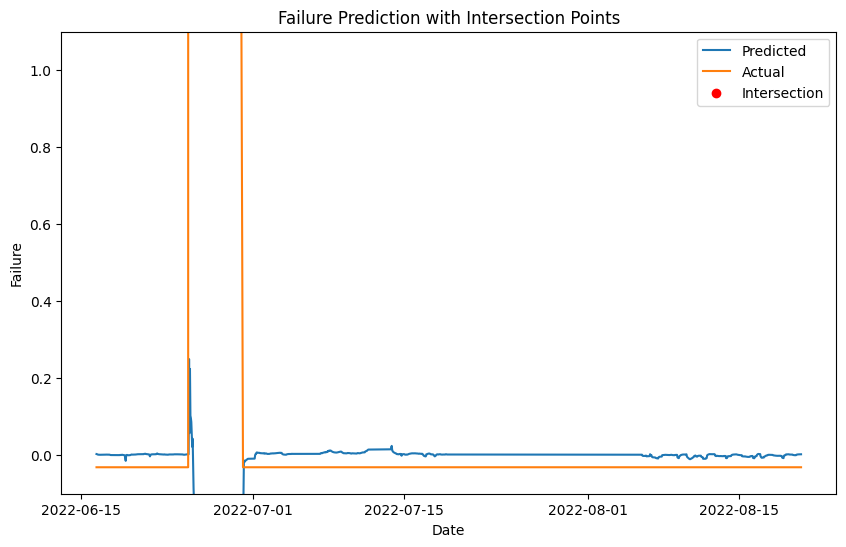

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

# Load and preprocess the dataset
failure_data = r'C:\Users\Niranjan\Desktop\BISAG\machine failed\cleaned_data.csv'
dataset = pd.read_csv(failure_data)
df = dataset
df2 = pd.DataFrame(df)
df2["Date"] = df2['Date'].astype(str) + "  " + df2['Time'].astype(str)
df2['Date'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y %H:%M:%S')
df2 = df2.drop(['Time'], axis=1)
df2 = df2.set_index("Date")
df_for_training = df2.astype(float)
target_variable = 'Failure'

# Split the data into train and test sets based on the specified time range
train_data = df_for_training.loc[:'2022-05-15 23:00:00']
test_data = df_for_training.loc['2022-05-15 23:00:00':'2022-08-20 19:00:00']

# Normalize the data
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Define the number of time steps and features
n_steps = 12
n_features = df_for_training.shape[1]

# Prepare the training data
train_X, train_y = [], []
for i in range(n_steps, len(train_data_scaled)):
    train_X.append(train_data_scaled[i - n_steps:i])
    train_y.append(train_data_scaled[i, df_for_training.columns.get_loc(target_variable)])
train_X, train_y = np.array(train_X), np.array(train_y)

# Prepare the test data
test_X, test_y = [], []
for i in range(n_steps, len(test_data_scaled)):
    test_X.append(test_data_scaled[i - n_steps:i])
    test_y.append(test_data_scaled[i, df_for_training.columns.get_loc(target_variable)])
test_X, test_y = np.array(test_X), np.array(test_y)

# Define and train the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(n_features))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model.fit(train_X, train_y, epochs=10, batch_size=16)

# Make predictions on the test data
test_predictions = model.predict(test_X)

# Reshape test_predictions to match the shape of the original scaled data
test_predictions = test_predictions.reshape(-1, n_features)

# Inverse scaling
test_predictions = scaler.inverse_transform(test_predictions)

# Convert the predictions and ground truth to pandas DataFrame for visualization
predicted_df = pd.DataFrame(test_predictions, index=test_data.index[n_steps:n_steps + len(test_predictions)], columns=df_for_training.columns)
actual_df = pd.DataFrame(test_y, index=test_data.index[n_steps:], columns=[target_variable])
# Find the intersection points
intersections = predicted_df[predicted_df.eq(actual_df.shift())].dropna()

# Plot the predicted and actual values with intersection points
plt.figure(figsize=(10, 6))
plt.plot(predicted_df.index, predicted_df[target_variable], label='Predicted')
plt.plot(actual_df.index, actual_df[target_variable], label='Actual')
plt.scatter(intersections.index, intersections[target_variable], color='red', label='Intersection')

# Set y-axis limits to only show values of 0 and 1
plt.ylim([-0.1, 1.1])

plt.xlabel('Date')
plt.ylabel(target_variable)
plt.title('Failure Prediction with Intersection Points')
plt.legend()
plt.show()
